When sheets of plastic and of other insulating materials are used in the construction of building walls and ceilings, a balance is sought between the need to minimise the loss of heat and the need to include (non-insulating) holes to allow gases, especially water vapour, to pass. We will model a two dimensional analogue of this problem. A perfectly insulating sheet containing equally spaced holes is placed between two constant temperature surfaces and
the resulting steady-state temperature distribution is computed. The steady-state temperature distribution is computed by solving Laplace's equation using a so-called relaxation method.

We start from the non-steady-state (Poisson's) equation appropriate to heat conduction,
\begin{equation}
    \kappa\nabla^2T = \rho s\frac{\partial T}{\partial t}
\end{equation}
where $T$ is temperature, $t$ is time, $\kappa$ is the thermal conductivity of the medium, $\rho$ is its density and $s$ is its specific heat. We then impose the steady-state condition $\frac{\partial T}{\partial t} = 0$, to obtain
\begin{equation}
    \nabla^2T = 0,
\end{equation}
that is, Laplace's equation.

We will consider a unit square $0 \leq x \leq 1$ and $0 \leq y \leq 1$ in which the left side $x = 0$ is held at constant temperature $0$, the right side $x = 1$ at constant temperature $1$, and in which the top and bottom boundaries $y = 0, 1$ are perfect insulators, so that there is no temperature flux across the top and bottom. Thus the boundary conditions are
\begin{align}
    T(0, y) = 0, &\quad T(1, y) = 1 \\
    \frac{\partial T}{\partial y}(x, 0) = 0, &\quad \frac{\partial T}{\partial y}(x, 1) = 0
\end{align}
The analytic solution to this problem is easy to find; this therefore allows us to check the accuracy of our numerical method and confirm that it is working correctly.

Consider the following $N_x \times N_y$ discretisation of the unit square
\begin{align}
    x_i = i\Delta x, \quad i = 0, 1, \dots, N_x, \quad \Delta x = \frac{1}{N_x}, \\
    y_j = j\Delta y, \quad j = 0, 1, \dots, N_y, \quad \Delta y = \frac{1}{N_y}.
\end{align}
Let us adopt the notation $T_{i,j} = T(x_i, y_j)$ for the numerical solution to the Laplace equation. We approximate $\frac{\partial^2T}{\partial x^2}$ and $\frac{\partial^2T}{\partial y^2}$ to second order at a general internal point $(x_i, y_j)$ with
\begin{align}
    \frac{\partial^2T}{\partial x^2} = \frac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{\Delta x^2}, \\
    \frac{\partial^2T}{\partial y^2} = \frac{T_{i,j+1} - 2T_{i,j} + T_{i,j-1}}{\Delta y^2}.
\end{align}
By choosing the special case $\Delta x = \Delta y = \Delta$, which implies $N_x = N_y$, Laplace's equation can therefore be written in discretised form to second order as
\begin{equation}
    0 = -4T_{i,j} + T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1}.
\end{equation}
This is solved using a relaxation method. So-called multigrid methods are faster, but they involve extra complications. The relaxation method iteration is started by choosing any initial values for the $T_{i,j}$. Initial values
that are close to the solution will converge quicker than initial values that are very different from the solution. Each subsequent iteration step consists of computing new values for $T_{i,j}$ successively for each internal point using the relaxation algorithm
\begin{equation}
    T^{\text{new}}_{i,j} = (1 - \sigma)T^{\text{old}}_{i,j} + \frac{\sigma}{4}(T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1}),
\end{equation}
where $\sigma$ is a pre-determined constant.

New values for $T_{i,j}$ on the boundary are then computed by applying the appropriate boundary conditions. Applying the first two boundary conditions is simply a matter of not changing the boundary points $T_{0,j}$ and $T_{N_x,j}$. The third boundary condition can be obtained by using a central difference approximation to $\frac{\partial T}{\partial y}$ at a general boundary point $(x_i, y_j)$,
\begin{equation}
    \frac{\partial T}{\partial y} = \frac{T_{i,j+1} - T_{i,j-1}}{2\Delta} = 0.
\end{equation}
This approximation is used with relaxation to compute a new value for $T_{i,j}$ on the boundary in terms of points that are either on the boundary or internal. For example, the bottom $j = 0$ boundary points are computed using
\begin{equation}
    T^{\text{new}}_{i,0} = (1 - \sigma)T^{\text{old}}_{i,0} + \frac{\sigma}{4}(T_{i+1,0} + T_{i-1,0} + 2T_{i,1}),
\end{equation}
and an analogous formula is used for the top $j = N_y$ boundary points.

Further iterations are carried out until the $T_{i,j}$ have converged at which time they are the desired solution to the discrete equation. The special case $\sigma = 1$ is called the Jacobi relaxation method. However, in practice, convergence can be considerably faster if an appropriate value
$\sigma > 1$ is chosen (called over-relaxation). A good first choice is typically $\sigma = 2.0$


Convergence reached after 225 iterations.


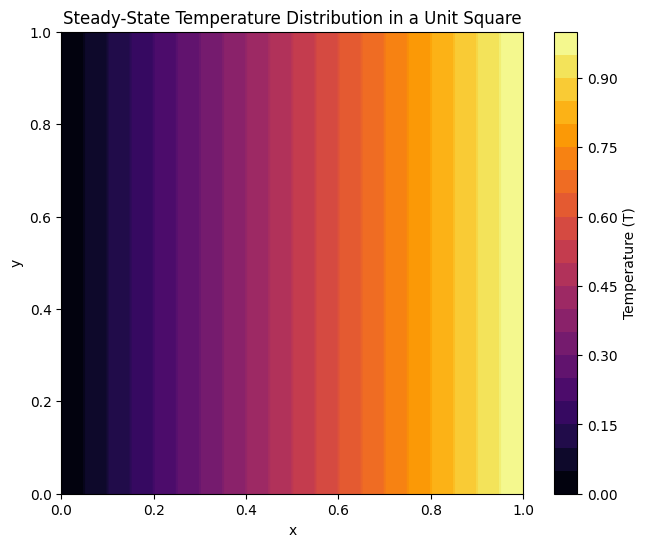

Relaxation parameter: 1.0
Convergence reached after 1731 iterations.
Relaxation parameter: 1.2
Convergence reached after 1432 iterations.
Relaxation parameter: 1.4
Convergence reached after 1117 iterations.
Relaxation parameter: 1.6
Convergence reached after 791 iterations.
Relaxation parameter: 1.8
Convergence reached after 442 iterations.
Relaxation parameter: 2.0
Maximum number of iterations (2000) reached without convergence.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def solve_laplace_gauss_seidel(N=50, sigma=1.9, tol=1e-5, max_iter=10000):
    '''
    Solves Laplace's equation for a unit square using the Gauss-Seidel method
    with successive over-relaxation.
    Args:
        N: The number of grid points in each direction (Nx = Ny = N).
        sigma: The over-relaxation parameter.
        tol: The convergence tolerance.
        max_iter: The maximum number of iterations.
    Returns:
        A tuple containing the final temperature array (T) and the number of iterations.
    '''
    # Initialisation
    # T[i, j] corresponds to T(y_i, x_j)
    T = np.full((N + 1, N + 1), 0.5)

    # Apply Boundary Conditions
    # T(y, x=0) = 0 (left side) -> T[:, 0]
    T[:, 0] = 0.0
    # T(y, x=1) = 1 (right side) -> T[:, N]
    T[:, N] = 1.0

    # Iteration Loop
    for iteration in range(max_iter):
        T_old = T.copy()

        # Update Interior Points
        # Loop over y (rows, i) and x (columns, j)
        for i in range(1, N):
            for j in range(1, N):
                T[i, j] = (1 - sigma) * T_old[i, j] + (sigma / 4.0) * \
                          (T[i, j+1] + T[i, j-1] + T[i+1, j] + T[i-1, j])

        # Update Insulated Boundary Points (Top and Bottom)
        for j in range(1, N): # Loop over all interior x-points
            # Bottom boundary (i=0)
            T[0, j] = (1 - sigma) * T_old[0, j] + (sigma / 4.0) * \
                      (T[0, j+1] + T[0, j-1] + 2 * T[1, j])
            # Top boundary (i=N)
            T[N, j] = (1 - sigma) * T_old[N, j] + (sigma / 4.0) * \
                      (T[N, j+1] + T[N, j-1] + 2 * T[N-1, j])

        # Check for Convergence
        # Using the maximum absolute change between iterations
        max_change = np.abs(T - T_old).max()

        if max_change < tol:
            print(f"Convergence reached after {iteration + 1} iterations.")
            break
    else:
        print(f"Maximum number of iterations ({max_iter}) reached without convergence.")

    return T, iteration + 1

def plot_contours(T, N):
    '''
    Plots the temperature contours.

    Args:
        T (np.ndarray): The temperature array.
        N (int): The number of grid points.
    '''
    x = np.linspace(0, 1, N + 1)
    y = np.linspace(0, 1, N + 1)
    X, Y = np.meshgrid(x, y)

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, T, levels=20, cmap='inferno')
    plt.colorbar(cp, label='Temperature (T)')
    plt.contour(X, Y, T, levels=cp.levels, cmap='inferno')

    plt.title("Steady-State Temperature Distribution in a Unit Square")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal')
    plt.show()

GRID_POINTS = 50
SIGMA = 1.9
TOLERANCE = 1e-6
MAX_ITERATIONS = 2000
temperature_grid, iterations = solve_laplace_gauss_seidel(
    N=GRID_POINTS,
    sigma=SIGMA,
    tol=TOLERANCE,
    max_iter=MAX_ITERATIONS
)
plot_contours(temperature_grid, GRID_POINTS)

SIGMA_VALUES = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
for sigma in SIGMA_VALUES:
    print(f"Relaxation parameter: {sigma}")
    temperature_grid, iterations = solve_laplace_gauss_seidel(
        N=GRID_POINTS,
        sigma=sigma,
        tol=TOLERANCE,
        max_iter=MAX_ITERATIONS
    )

To determine if the temperature array $T$ had converged to a steady-state solution, an iterative approach was used. After all points have been updated in the current iteration, the absolute difference between the new array and the old array is calculated for every point on the grid. The maximum change value is then compared against the tolerance.

Taking the relaxation parameter outside of the range $(0, 2)$ will cause the method to diverge and become unstable. The Gauss-Seidel method $\sigma = 1$ is the baseline case without any over-relaxation. It requires the highest number of iterations to converge. As $\sigma$ is increased from $1$, the number of iterations required for convergence decreases because over-relaxation pushes the value of $T_ij$ more aggressively towards its final steady-state value. The optimal value lies below but close to $\sigma = 2$. Increasing beyond this optimal point causes the number of iterations to increase again as the relaxation process starts to overshoot the correct solution.